In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls -R /content/drive/MyDrive/X-Ray-Scanner-Dataset



/content/drive/MyDrive/X-Ray-Scanner-Dataset:
train  val  vit_checkpoint.pth

/content/drive/MyDrive/X-Ray-Scanner-Dataset/train:
dangerous  not_dangerous

/content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous:
B0001_0003..jpg  B0046_0032..jpg  B0046_0074..jpg  B0046_0114..jpg  B0046_0158..jpg
B0001_0004..jpg  B0046_0033..jpg  B0046_0075..jpg  B0046_0115..jpg  B0046_0159..jpg
B0001_0005..jpg  B0046_0034..jpg  B0046_0076..jpg  B0046_0116..jpg  B0046_0160..jpg
B0001_0007..jpg  B0046_0035..jpg  B0046_0077..jpg  B0046_0119..jpg  B0046_0161..jpg
B0001_0009..jpg  B0046_0036..jpg  B0046_0078..jpg  B0046_0122..jpg  B0046_0162..jpg
B0001_0010..jpg  B0046_0037..jpg  B0046_0080..jpg  B0046_0123..jpg  B0046_0163..jpg
B0001_0011..jpg  B0046_0038..jpg  B0046_0081..jpg  B0046_0124..jpg  B0046_0164..jpg
B0001_0013..jpg  B0046_0039..jpg  B0046_0082..jpg  B0046_0125..jpg  B0046_0166..jpg
B0001_0014..jpg  B0046_0040..jpg  B0046_0083..jpg  B0046_0126..jpg  B0046_0167..jpg
B0046_0002..jpg  B0046_004

In [ ]:
!ls -l /content/drive/MyDrive/dataset/Dataset/train


total 8
drwx------ 2 root root 4096 Nov 21 12:13  Dangerous
drwx------ 2 root root 4096 Nov 21 12:13 'Not Dangerous'


In [ ]:
import os

train_folder = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/train'
val_folder = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/val'

print("Checking folders...")
print("Train folder exists:", os.path.exists(train_folder))
print("Train/dangerous exists:", os.path.exists(os.path.join(train_folder, "dangerous")))
print("Train/not_dangerous exists:", os.path.exists(os.path.join(train_folder, "not_dangerous")))


Checking folders...
Train folder exists: True
Train/dangerous exists: True
Train/not_dangerous exists: True


In [ ]:
import os

DATASET_PATH = '/content/drive/MyDrive/X-Ray-Scanner-Dataset'


In [ ]:
!pip install torch torchvision timm matplotlib scikit-learn opencv-python matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import timm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
import os
import random


In [ ]:
!ls -R /content/drive/MyDrive/X-Ray-Scanner-Dataset/train


/content/drive/MyDrive/X-Ray-Scanner-Dataset/train:
dangerous  not_dangerous

/content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous:
B0001_0003..jpg  B0046_0032..jpg  B0046_0074..jpg  B0046_0114..jpg  B0046_0158..jpg
B0001_0004..jpg  B0046_0033..jpg  B0046_0075..jpg  B0046_0115..jpg  B0046_0159..jpg
B0001_0005..jpg  B0046_0034..jpg  B0046_0076..jpg  B0046_0116..jpg  B0046_0160..jpg
B0001_0007..jpg  B0046_0035..jpg  B0046_0077..jpg  B0046_0119..jpg  B0046_0161..jpg
B0001_0009..jpg  B0046_0036..jpg  B0046_0078..jpg  B0046_0122..jpg  B0046_0162..jpg
B0001_0010..jpg  B0046_0037..jpg  B0046_0080..jpg  B0046_0123..jpg  B0046_0163..jpg
B0001_0011..jpg  B0046_0038..jpg  B0046_0081..jpg  B0046_0124..jpg  B0046_0164..jpg
B0001_0013..jpg  B0046_0039..jpg  B0046_0082..jpg  B0046_0125..jpg  B0046_0166..jpg
B0001_0014..jpg  B0046_0040..jpg  B0046_0083..jpg  B0046_0126..jpg  B0046_0167..jpg
B0046_0002..jpg  B0046_0041..jpg  B0046_0084..jpg  B0046_0127..jpg  B0046_0168..jpg
B0046_0003..jpg  B00

In [ ]:
ls -R /content/drive/MyDrive/dataset/Dataset/val

/content/drive/MyDrive/dataset/Dataset/val:
 Dangerous/  'Not Dangerous'/

/content/drive/MyDrive/dataset/Dataset/val/Dangerous:
B0001_0005..jpg  B0046_0046..jpg  B0046_0064..jpg  B0046_0119..jpg  B0046_0160..jpg
B0001_0007..jpg  B0046_0049..jpg  B0046_0096..jpg  B0046_0133..jpg  B0046_0171..jpg
B0046_0003..jpg  B0046_0052..jpg  B0046_0103..jpg  B0046_0147..jpg
B0046_0004..jpg  B0046_0059..jpg  B0046_0116..jpg  B0046_0149..jpg

'/content/drive/MyDrive/dataset/Dataset/val/Not Dangerous':
grayscaled23.jpg  S0003_0036.jpg  S0005_0018.jpg  S0006_0002.jpg  S0007_0018.jpg  S0007_0026.jpg
grayscaled39.jpg  S0004_0019.jpg  S0005_0019.jpg  S0006_0013.jpg  S0007_0021.jpg  S0007_0027.jpg
S0003_0021.jpg    S0004_0022.jpg  S0005_0021.jpg  S0007_0002.jpg  S0007_0022.jpg


In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch

class XRayDataset(Dataset):
    def __init__(self, root_folder, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []

        class_map = {"dangerous": 1, "not_dangerous": 0}

        print(f"📂 Scanning root folder: {root_folder}")

        if not os.path.exists(root_folder):
            raise FileNotFoundError(f"❌ Root folder not found: {root_folder}")

        for class_name, label in class_map.items():
            class_folder = os.path.join(root_folder, class_name)
            print(f"🔍 Checking folder: {class_folder}")

            if not os.path.exists(class_folder):
                raise FileNotFoundError(f"❌ Class folder not found: {class_folder}")

            num_files = 0
            for file_name in os.listdir(class_folder):
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(class_folder, file_name))
                    self.labels.append(label)
                    num_files += 1

            print(f"✅ Found {num_files} files in {class_folder}")

        if len(self.image_paths) == 0:
            raise ValueError(f"❌ No images found in {root_folder}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label, image_path



transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_folder = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/train'
val_folder = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/val'

print("🚀 Starting dataset load process...")

print("\n[TRAIN DATASET CHECK]")
train_dataset = XRayDataset(train_folder, transform=transform)

print("\n[VAL DATASET CHECK]")
val_dataset = XRayDataset(val_folder, transform=transform)

print(f"\n✅ Total Train Images: {len(train_dataset)}")
print(f"✅ Total Val Images: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


🚀 Starting dataset load process...

[TRAIN DATASET CHECK]
📂 Scanning root folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/train
🔍 Checking folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous
✅ Found 180 files in /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous
🔍 Checking folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/not_dangerous
✅ Found 179 files in /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/not_dangerous

[VAL DATASET CHECK]
📂 Scanning root folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/val
🔍 Checking folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/val/dangerous
✅ Found 106 files in /content/drive/MyDrive/X-Ray-Scanner-Dataset/val/dangerous
🔍 Checking folder: /content/drive/MyDrive/X-Ray-Scanner-Dataset/val/not_dangerous
✅ Found 100 files in /content/drive/MyDrive/X-Ray-Scanner-Dataset/val/not_dangerous

✅ Total Train Images: 359
✅ Total Val Images: 206


In [ ]:
import torch
import torch.nn as nn
from transformers import ViTModel

class ViTWithDetection(nn.Module):
    def __init__(self, num_classes=2):
        super(ViTWithDetection, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_classes)

        self.bbox_regressor = nn.Linear(self.vit.config.hidden_size, 4)

    def forward(self, x):
        outputs = self.vit(x)
        pooled_output = outputs.last_hidden_state[:, 0]

        class_logits = self.classifier(pooled_output)

        bbox = self.bbox_regressor(pooled_output)
        bbox = torch.sigmoid(bbox)

        return class_logits, bbox


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViTWithDetection().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def compute_loss(class_logits, bbox, labels, images):
    classification_loss = F.cross_entropy(class_logits, labels)

    target_bbox = torch.zeros_like(bbox).to(device)
    target_bbox[labels == 1] = torch.tensor([0.3, 0.3, 0.7, 0.7]).to(device)

    bbox_loss = F.mse_loss(bbox, target_bbox)

    return classification_loss + bbox_loss

def train_epoch(loader, model, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels, _ in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        class_logits, bbox = model(images)

        loss = compute_loss(class_logits, bbox, labels, images)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(class_logits, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    return running_loss / len(loader), accuracy


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous/B0001_0007..jpg'
print(f"File exists: {os.path.exists(image_path)}")

def draw_and_display(image_path, bbox=None, harmful_detected=False):
    """
    Draw bounding box if harmful object detected, and display the image.
    Works in Google Colab (uses matplotlib instead of cv2.imshow).
    """

    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return

    print(f"Displaying image: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    if harmful_detected and bbox is not None:
        h, w = img.shape[:2]
        x_min = int(bbox[0] * w)
        y_min = int(bbox[1] * h)
        x_max = int(bbox[2] * w)
        y_max = int(bbox[3] * h)

        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(img, 'Harmful Object Detected', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        print("🚨 Harmful Object Detected 🚨")

    else:
        cv2.putText(img, 'No Harmful Object Found', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        print("✅ No Harmful Object Found ✅")

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


File exists: True


Displaying image: /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous/B0046_0022..jpg
🚨 Harmful Object Detected 🚨


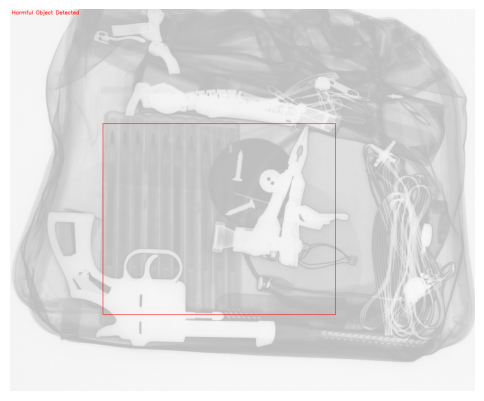

Displaying image: /content/drive/MyDrive/X-Ray-Scanner-Dataset/train/not_dangerous/grayscaled34.jpg
✅ No Harmful Object Found ✅


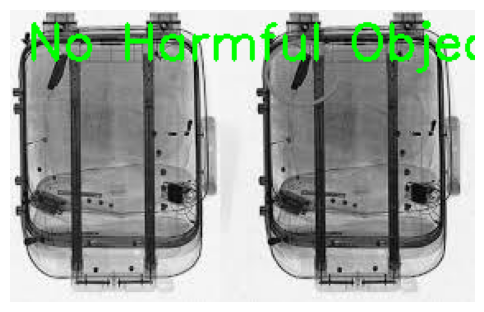

In [ ]:

example_image_path1 = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/train/dangerous/B0046_0022..jpg'
example_bbox = [0.2, 0.3, 0.7, 0.8]
example_image_path2 = '/content/drive/MyDrive/X-Ray-Scanner-Dataset/train/not_dangerous/grayscaled34.jpg'

draw_and_display(example_image_path1, bbox=example_bbox, harmful_detected=True)

draw_and_display(example_image_path2, bbox=None, harmful_detected=False)


Using device: cuda


<ipython-input-18-9cb5b1dd1c06>:54: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
  0%|          | 0/60 [00:00<?, ?it/s]<ipython-input-18-9cb5b1dd1c06>:69: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1/5: 100%|██████████| 60/60 [00:15<00:00,  3.97it/s, acc=96.7, loss=0]


Epoch 1: Train Loss: 0.0934, Train Acc: 96.66%


Epoch 2/5: 100%|██████████| 60/60 [00:16<00:00,  3.56it/s, acc=100, loss=0]


Epoch 2: Train Loss: 0.0000, Train Acc: 100.00%


Epoch 3/5: 100%|██████████| 60/60 [00:16<00:00,  3.59it/s, acc=96.9, loss=0]


Epoch 3: Train Loss: 0.3890, Train Acc: 96.94%


Epoch 4/5: 100%|██████████| 60/60 [00:19<00:00,  3.11it/s, acc=95, loss=2.21]


Epoch 4: Train Loss: 0.6383, Train Acc: 94.99%


Epoch 5/5: 100%|██████████| 60/60 [00:16<00:00,  3.58it/s, acc=97.5, loss=0]


Epoch 5: Train Loss: 0.2877, Train Acc: 97.49%

Mean Training Accuracy after 5 epochs: 97.21%


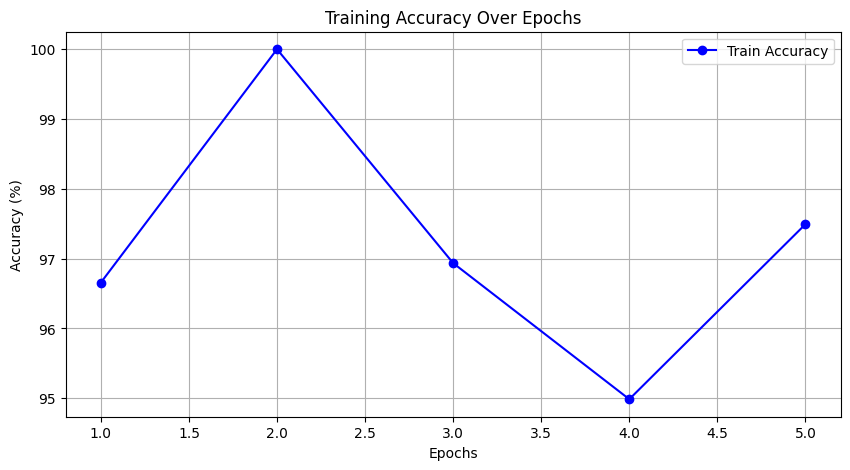

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

train_data_path = "/content/drive/MyDrive/X-Ray-Scanner-Dataset/train"

if not os.path.exists(train_data_path):
    raise FileNotFoundError(f"Training data path does not exist: {train_data_path}")

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = torchvision.datasets.ImageFolder(root=train_data_path, transform=train_transforms)


train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True, num_workers=2, pin_memory=True)


model = torchvision.models.vit_b_16(pretrained=True)
num_ftrs = model.heads.head.in_features
model.heads.head = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, len(train_dataset.classes))
)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0004, weight_decay=2e-4)
scheduler = StepLR(optimizer, step_size=3, gamma=0.6)

scaler = torch.cuda.amp.GradScaler()

def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=5, device="cpu"):
    train_losses, train_accuracies = [], []
    epochs_list = []

    model.train()
    for epoch in range(num_epochs):
        running_loss, correct, total = 0.0, 0, 0
        loop = tqdm(train_loader, leave=True)

        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.cuda.amp.autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.8)
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            loop.set_description(f"Epoch {epoch+1}/{num_epochs}")
            loop.set_postfix(loss=loss.item(), acc=100 * correct / total)

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)
        scheduler.step()
        epochs_list.append(epoch + 1)

        print(f"Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%")

    mean_accuracy = sum(train_accuracies) / len(train_accuracies)
    print(f"\nMean Training Accuracy after {num_epochs} epochs: {mean_accuracy:.2f}%")

    return train_losses, train_accuracies, epochs_list, mean_accuracy


train_losses, train_accuracies, epochs_list, mean_accuracy = train_model(
    model, train_loader, criterion, optimizer, scheduler, num_epochs=5, device=device
)

plt.figure(figsize=(10, 5))
plt.plot(epochs_list, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.show()
